# **Rede Social**


Menu:
1. Criar Perfil
2. Adicionar Amigos
3. Exibir Rede Social
4. Buscar Pessoa
5. Pessoa(s) com Mais Relacionamentos
6. Pessoa(s) com Menos Relacionamentos
7. Consultar Relacionamento
8. Consultar Por Pais
9. Salvar e Sair
Escolha uma opção: 4
Informe o nome da pessoa que deseja buscar: Shuri

Dados da Pessoa:
Nome: Shuri
Idade: 30
Profissão: Princesa
Estado Civil: Solteiro (a)
Pais: Wakanda



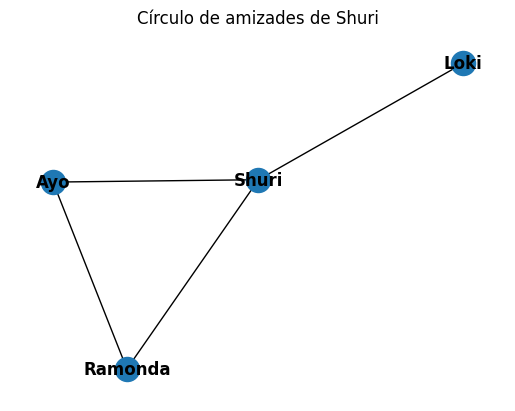


Menu:
1. Criar Perfil
2. Adicionar Amigos
3. Exibir Rede Social
4. Buscar Pessoa
5. Pessoa(s) com Mais Relacionamentos
6. Pessoa(s) com Menos Relacionamentos
7. Consultar Relacionamento
8. Consultar Por Pais
9. Salvar e Sair
Escolha uma opção: 9


In [11]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

facebook = {}

def criar_perfil(usuarios, nome, idade, profissao, estado_civil, pais):
    usuarios[nome] = {'idade': idade, 'profissao': profissao, 'estado_civil': estado_civil, 'pais': pais, 'relacionamentos': []}
    print(f"Olá {nome}. Bem-vindo ao Facebook!")

def adicionar_amigos(usuarios, user1, user2):
    if user1 in usuarios and user2 in usuarios:
        usuarios[user1]['relacionamentos'].append(user2)
        usuarios[user2]['relacionamentos'].append(user1)
        print(f"{user1} e {user2} agora são amigos!")
    else:
        print("Pedimos desculpas, mas não foi possível localizar o usuário.")

def listar_perfis(usuarios):
    print("Nome\t\tIdade\tProfissão\tEstado Civil\tPais\tRelacionamentos")
    for nome, dados in usuarios.items():
        relacionamentos = ', '.join(dados['relacionamentos'])
        print(f"{nome}\t\t{dados['idade']}\t{dados['profissao']}\t\t{dados['estado_civil']}\t\t{dados['pais']}\t\t{relacionamentos}")

def salvar_para_csv(usuarios, arquivo):
    with open(arquivo, 'w', newline='') as csvfile:
        fieldnames = ['Nome', 'Idade', 'Profissão', 'Estado Civil', 'Pais', 'Relacionamentos']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for nome, dados in usuarios.items():
            relacionamentos = ', '.join(dados['relacionamentos'])
            writer.writerow({'Nome': nome, 'Idade': dados['idade'], 'Profissão': dados['profissao'], 'Estado Civil': dados['estado_civil'], 'Pais': dados['pais'], 'Relacionamentos': relacionamentos})

def carregar_do_csv(arquivo):
    usuarios = {}
    try:
        with open(arquivo, newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            for row in reader:
                nome = row['Nome']
                idade = int(row['Idade'])
                profissao = row['Profissão']
                estado_civil = row['Estado Civil']
                pais = row['Pais']
                relacionamentos = [amigo.strip() for amigo in row['Relacionamentos'].split(',')] if row['Relacionamentos'] else []
                usuarios[nome] = {'idade': idade, 'profissao': profissao, 'estado_civil': estado_civil, 'pais': pais, 'relacionamentos': relacionamentos}
    except FileNotFoundError:
        pass
    return usuarios


def criar_grafo(usuarios):
    G = nx.Graph()
    for nome, dados in usuarios.items():
        G.add_node(nome, idade=dados['idade'], profissao=dados['profissao'], estado_civil=dados['estado_civil'], pais=dados['pais'])
        for amigo in dados['relacionamentos']:
            G.add_edge(nome, amigo)
    return G


def exibir_grafo(grafo):
    pos = nx.spring_layout(grafo)
    nx.draw(grafo, pos, with_labels=True, font_weight='bold')
    plt.show()


def buscar_pessoa(usuarios, grafo, nome):
    if nome in usuarios:
        dados = usuarios[nome]
        relacionamentos = dados['relacionamentos']

        print("\nDados da Pessoa:")
        print(f"Nome: {nome}")
        print(f"Idade: {dados['idade']}")
        print(f"Profissão: {dados['profissao']}")
        print(f"Estado Civil: {dados['estado_civil']}")
        print(f"Pais: {dados['pais']}")
        print()

        plt.title(f"Círculo de amizades de {nome}")

        subgraph = grafo.subgraph([nome] + relacionamentos)
        pos = nx.spring_layout(subgraph)
        nx.draw(subgraph, pos, with_labels=True, font_weight='bold')
        plt.show()
    else:
        print("Pessoa não encontrada.")


#consultar ligação entre amigos
def conhece_alguem(grafo, pessoa1, pessoa2):
    if grafo.has_edge(pessoa1, pessoa2):
        print(f"{pessoa1} conhece {pessoa2} diretamente.")
        return True
    else:
        shortest_path = nx.shortest_path(grafo, source=pessoa1, target=pessoa2)
        print(f"{pessoa1} não conhece {pessoa2} diretamente, mas poderia conhecer através de: {shortest_path}")
        return False


#maior numero de amigos
def calcular_maior_grau(grafo):
    centralidades = nx.degree_centrality(grafo)

    max_centralidade = max(centralidades.values())
    pessoas_mais_centrais = [nome for nome, centralidade in centralidades.items() if centralidade == max_centralidade]

    print("\nPessoa(s) com a maior quantidade de amigos:")
    for pessoa in pessoas_mais_centrais:
        print(f"{pessoa}")

#menor numero de amigos
def calcular_menor_grau(grafo):
    centralidades = nx.degree_centrality(grafo)

    min_centralidade = min(centralidades.values())
    pessoas_menos_centrais = [nome for nome, centralidade in centralidades.items() if centralidade == min_centralidade]

    print("\nPessoa(s) com a menor quantidade de amigos:")
    for pessoa in pessoas_menos_centrais:
      print(f"{pessoa}")

#Consultar usuário de terminado pais (função adicional)
def consultar_pais(usuarios, grafo, pais):
    users_in_city = [nome for nome, dados in usuarios.items() if dados['pais'] == pais]

    if not users_in_city:
        print(f"Nenhum usuário cadastrado no {pais}.")
        return

    plt.title(f"Rede Social: Usuários de {pais}")

    #Usuários da cidade
    subgraph = grafo.subgraph(users_in_city)

    #grafo
    node_colors = ['pink' if nome in users_in_city else 'gray' for nome in grafo.nodes]

    pos = nx.spring_layout(grafo)
    nx.draw(grafo, pos, with_labels=True, font_weight='bold', node_color=node_colors)
    plt.show()



# Carregar dados do CSV
facebook = carregar_do_csv('rede_social.csv')

# Criar grado da rede social
social_network_graph = criar_grafo(facebook)

while True:
    print("\nMenu:")
    print("1. Criar Perfil")
    print("2. Adicionar Amigos")
    print("3. Exibir Rede Social")
    print("4. Buscar Pessoa")
    print("5. Pessoa(s) com Mais Relacionamentos")
    print("6. Pessoa(s) com Menos Relacionamentos")
    print("7. Consultar Relacionamento")
    print("8. Consultar Por Pais")
    print("9. Salvar e Sair")

    escolha = input("Escolha uma opção: ")
    if escolha == '1':
        nome = input("Informe seu nome: ")
        idade = int(input("Informe sua idade: "))
        profissao = input("Informe sua profissão: ")
        estado_civil = input("Informe seu estado civil: ")
        pais = input("Informe sua pais: ")
        criar_perfil(facebook, nome, idade, profissao, estado_civil, pais)
    elif escolha == '2':
        user1 = input("Informe seu nome: ")
        user2 = input("Informe o nome de seu amigo: ")
        adicionar_amigos(facebook, user1, user2)
    elif escolha == '3':
        #print(facebook)
        exibir_grafo(social_network_graph)
        listar_perfis(facebook)
    elif escolha == '4':
        nome_busca = input("Informe o nome da pessoa que deseja buscar: ")
        buscar_pessoa(facebook, social_network_graph, nome_busca)
    elif escolha == '5':
        calcular_maior_grau(social_network_graph)
    elif escolha == '6':
        calcular_menor_grau(social_network_graph)
    elif escolha == '7':
        pessoa1 = input("Informe o nome da primeira pessoa: ")
        pessoa2 = input("Informe o nome da segunda pessoa: ")
        conhece_alguem(social_network_graph, pessoa1, pessoa2)
    elif escolha == '8':
        pais_consulta = input("Informe a pais para consultar: ")
        consultar_pais(facebook, social_network_graph, pais_consulta)
    elif escolha == '9':
        salvar_para_csv(facebook, 'rede_social.csv')
        break
    else:
        print("Opção inválida. Por favor, escolha uma opção válida.")
